# Network Notes

In [1748]:
# good 160 unit *3 network
network_model = "func-26-1-8"
iter1 = 56
iter2 = 1490
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_fn_postfix2 = "output_" + str(0) + "_" + str(iter2)
output_fn_postfix2_mid = "output_" + str(1) + "_" + str(iter2)


from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Generating full output for output index: 2 
Generated full output of shape: (4944, 24, 64) 
Generating full output for output index: 2 
Generated full output of shape: (4944, 24, 64) 
Generating full output for output index: 2 
Generated full output of shape: (4944, 24, 64) 
Generating full output for output index: 2 
Generated full output of shape: (4944, 24, 64) 
Generating full output for output index: 2 
Generated full output of shape: (4944, 24, 64) 
Generating full output for output index: 2 
Generated full output of shape: (4944, 24, 64) 

 1235/49440 [..............................] - ETA: 406s - loss: 1.5043 - model_2_loss_1: 4.6916 - model_2_loss_2: 0.9482 - generator_TD_Dense_0_loss: 0.0033'


In [1749]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  450
num_iterations :  5000
fit_batch_size :  5
learn_next_step :  False
gen_every_nth :  10
generate_num_outputs :  2
save_model_every_nth :  10
framelen :  13
frame_seq_len :  100
overlap_sequence :  1
seed_seq_len :  100
seq_step :  98
test_data_fn :  ./test/criticalpracticalreason.c2-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-26-1-8/model-450.h5
frame_len_ms :  20


In [1750]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-26-1-8 Notes

2017-12-10 19:35:21

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 --load-weights=out/func-26-1-2/weights-1200.h5

## Description

Attempt to predict the mid layer to use it for later loss calculations
At iteration 444 changed the loss weights to favour the generator 
loss more highly. Also, switched to the long corpus.


In [1751]:
if model_type != 'functional':
  nd.model_config(network_model)

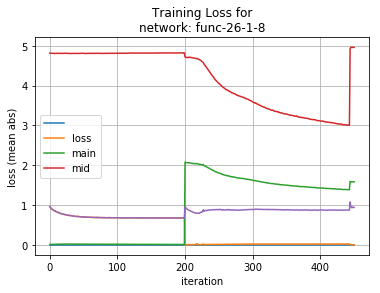

In [1752]:
nd.plot_training_loss(network_model, 'mean abs') 

In [1753]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/gen_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,loss,model_1_loss,model_2_loss_1,model_2_loss_2

0,0.0227588604782,1.38580443526,3.00513263592,0.8732390801
0,0.0231760681731,1.38623224445,3.00577106592,0.87326685053
0,0.0228359647348,1.38710840338,3.0070071617,0.875855660484
0,0.0131613752374,1.59265059611,4.92302510887,1.07846177693
0,0.00163009657063,1.58595447401,4.95926889426,0.971956871786
0,0.00141771821576,1.5829158898,4.95981983504,0.941192477947
0,0.00155481273296,1.58185210845,4.95940505884,0.930976426127
0,0.00150289313713,1.58479042122,4.9619814854,0.952941791105
0,0.00220758064526,1.58345381129,4.95895467487,0.944427998636
0,0.00269582481937,1.58301542025,4.95788022764,0.940337964978

450


Latest Iteration: 450
3200 rate codec



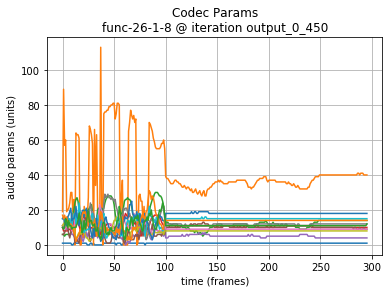

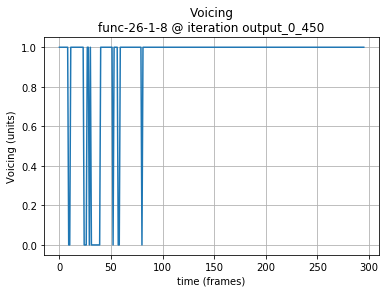

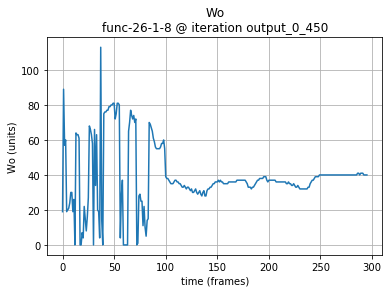

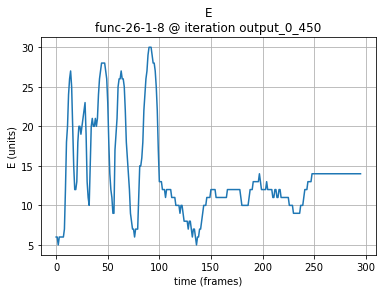

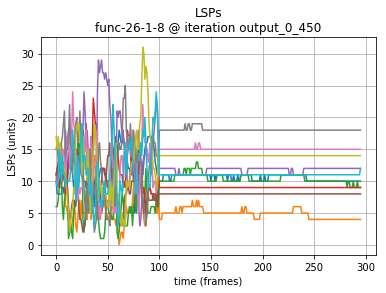

In [1754]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
  
  chart_postfix = output_fn_postfix

  nd.plot_codec_params(network_model,chart_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,chart_postfix, params='Voicing')
  nd.plot_spec_params(network_model,chart_postfix, params='Wo')
  nd.plot_spec_params(network_model,chart_postfix, params='E')
  nd.plot_spec_params(network_model,chart_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

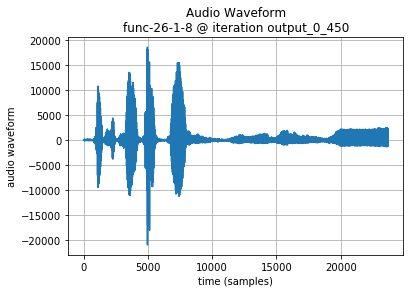

In [1755]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

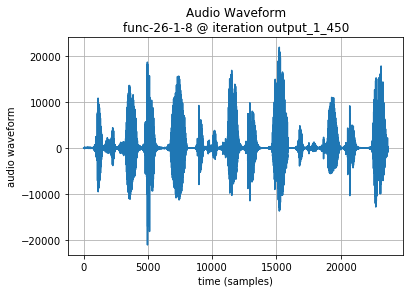

In [1756]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

Early Iterations
===

In [1757]:
print(output_fn_postfix1)
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

output_0_56


FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-26-1-8/out-c2cb-output_0_56'

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

In [ ]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 